In [ ]:
import geopandas as gpd

import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent# 找出根目錄：Path.cwd()找出現在所在目錄(/run).parent(上一層是notebook).parent(再上層一層business_district_discovery)
print(PROJECT_ROOT)
sys.path.append(str(PROJECT_ROOT))

from matplotlib.font_manager import fontManager
import matplotlib as mlp
FONT_PATH = PROJECT_ROOT / "ChineseFont.ttf"
fontManager.addfont(str(FONT_PATH))
mlp.rcParams["font.family"] = "ChineseFont"

import warnings
warnings.filterwarnings('ignore')

c:\labs\geo-grid


In [ ]:

from utils.helper_grid_s1 import plot_local_grid_by_targets, generate_joined_grids

In [11]:
# 來源檔案
my_shp = r"C:\labs\geo-grid\SHP\TOWN-TW97-LL\TOWN_MOI_1140318.shp"

# 1. 執行 300m 網格
generate_joined_grids(
    shp_path=my_shp,
    output_dir=r"C:\labs\geo-grid\data\output_grids\grids_100m_joined",
    cell_size=100
)


=== 開始執行任務: 網格大小 100m ===
來源: C:\labs\geo-grid\SHP\TOWN-TW97-LL\TOWN_MOI_1140318.shp
輸出: C:\labs\geo-grid\data\output_grids\grids_100m_joined
正在初始化網格產生器...
正在讀取並處理基礎圖資...
行政區底圖準備完成，共 368 筆。
開始執行空間連結 (Spatial Join - Centroid Method)...
啟動分批產生器，共 22 個縣市...
-> [1] 處理中: 臺東縣 | 原始網格數: 366,846
   合併後: 363,552 (已歸屬行政區)
-> [2] 處理中: 屏東縣 | 原始網格數: 291,033
   合併後: 288,696 (已歸屬行政區)
-> [3] 處理中: 雲林縣 | 原始網格數: 146,320
   合併後: 144,318 (已歸屬行政區)
-> [4] 處理中: 彰化縣 | 原始網格數: 130,731
   合併後: 129,467 (已歸屬行政區)
-> [5] 處理中: 苗栗縣 | 原始網格數: 188,692
   合併後: 187,226 (已歸屬行政區)
-> [6] 處理中: 新竹縣 | 原始網格數: 145,611
   合併後: 144,067 (已歸屬行政區)
-> [7] 處理中: 嘉義縣 | 原始網格數: 202,595
   合併後: 200,013 (已歸屬行政區)
-> [8] 處理中: 高雄市 | 原始網格數: 310,574
   合併後: 307,586 (已歸屬行政區)
-> [9] 處理中: 宜蘭縣 | 原始網格數: 226,058
   合併後: 223,838 (已歸屬行政區)
-> [10] 處理中: 連江縣 | 原始網格數: 4,104
   合併後: 2,993 (已歸屬行政區)
-> [11] 處理中: 金門縣 | 原始網格數: 19,783
   合併後: 18,919 (已歸屬行政區)
-> [12] 處理中: 臺中市 | 原始網格數: 231,543
   合併後: 229,471 (已歸屬行政區)
-> [13] 處理中: 澎湖縣 | 原始網格數: 17,005
   合併後: 13,627 (已歸屬

In [4]:
import geopandas as gpd
# 讀取測試
df_test = gpd.read_parquet(r"C:\labs\geo-grid\data\output_grids\grids_300m_joined\Grid_臺北市_300m_joined.parquet")
print(df_test.columns)
df_test.head() # 檢查是否有行政區名

Index(['grid_id', 'grid_col', 'grid_row', 'geometry', 'TOWNID', 'TOWNCODE',
       'COUNTYNAME', 'TOWNNAME', 'TOWNENG', 'COUNTYID', 'COUNTYCODE'],
      dtype='object')


,grid_id,grid_col,grid_row,geometry,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE
0,260405381,2604,5381,"POLYGON ((302700 2768700, 302700 2769000, 3024...",A03,63000050,臺北市,中正區,Zhongzheng District,A,63000
1,260405382,2604,5382,"POLYGON ((302700 2769000, 302700 2769300, 3024...",A03,63000050,臺北市,中正區,Zhongzheng District,A,63000
2,260505380,2605,5380,"POLYGON ((303000 2768400, 303000 2768700, 3027...",A03,63000050,臺北市,中正區,Zhongzheng District,A,63000
3,260505381,2605,5381,"POLYGON ((303000 2768700, 303000 2769000, 3027...",A02,63000030,臺北市,大安區,Da'an District,A,63000
4,260505382,2605,5382,"POLYGON ((303000 2769000, 303000 2769300, 3027...",A02,63000030,臺北市,大安區,Da'an District,A,63000


In [14]:
save_path_gdf = r"C:\labs\geo-grid\data\output_grids\grids_100m_joined\gdf_tm2_base.parquet"
gdf_tm2_loaded = gpd.read_parquet(save_path_gdf)

In [15]:
save_path_grid = r"C:\labs\geo-grid\data\output_grids\grids_100m_joined\Grid_臺北市_100m_joined.parquet"
grid_loaded = gpd.read_parquet(save_path_grid)

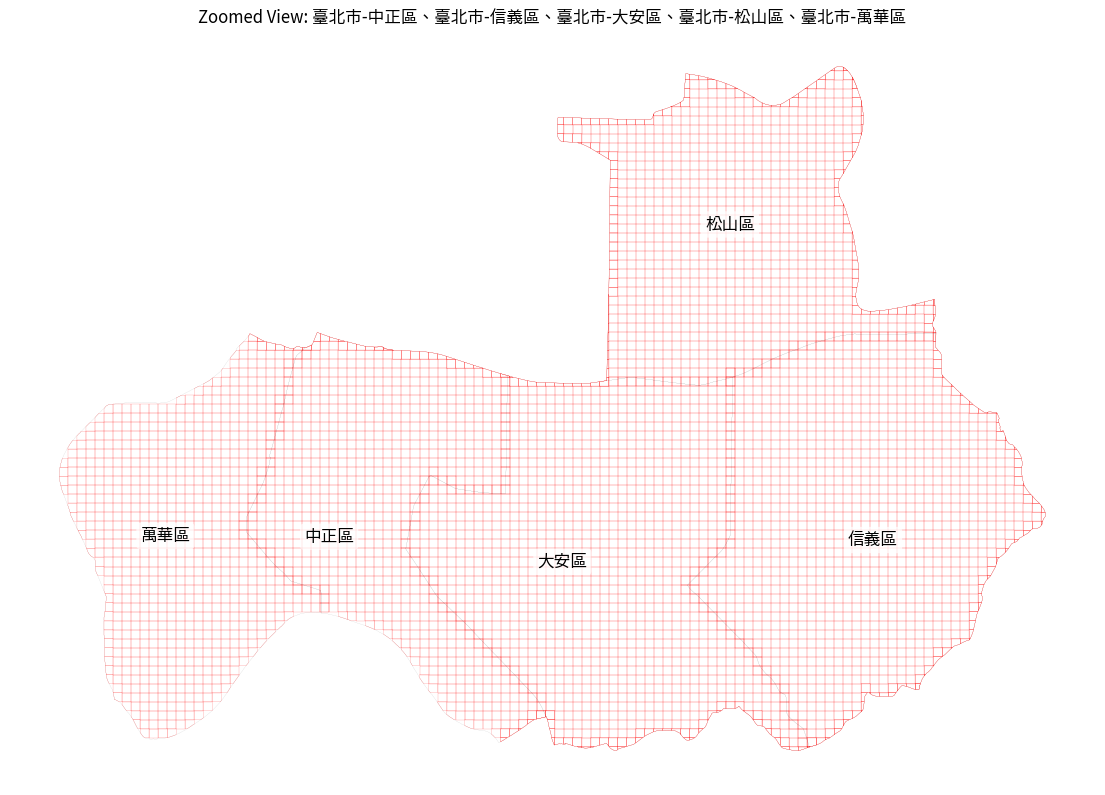

In [18]:
# 檢視特定區域的方格
local_grid = plot_local_grid_by_targets(
    figsize=(14, 16),
    town_gdf=gdf_tm2_loaded,
    grid_gdf=grid_loaded,
    targets=[
        ("臺北市", '松山區'),
        ("臺北市", '大安區'),
        ("臺北市", '信義區'),
        ("臺北市", '中正區'),
        ("臺北市", '萬華區'),


    ],
    show_labels=True,
    town_linewidth=0.03,
    grid_linewidth=0.1,
    rasterized=False
)

In [ ]:
# import pandas as pd
# import geopandas as gpd
# from pathlib import Path
# import warnings

# # 忽略一些 appending 的警告
# warnings.filterwarnings('ignore')

# source_dir = Path(r"C:\labs\geo-grid\OUTPUT_GRIDS")
# output_file = r"C:\labs\geo-grid\All_Taiwan_Grid.gpkg"  # 存成 GeoPackage

# # 取得所有 parquet 檔
# files = list(source_dir.glob("*.parquet"))

# print(f"開始合併 {len(files)} 個檔案到 {output_file}...")

# for i, file in enumerate(files):
#     # 1. 讀取一個縣市
#     gdf = gpd.read_parquet(file)
    
#     # 2. 寫入 (如果是第一個檔就 'w' 寫入，之後都用 'a' 附加)
#     mode = 'w' if i == 0 else 'a'
    
#     # 注意：to_file 支援 append 模式，但速度會隨檔案變大而變慢
#     gdf.to_file(output_file, driver="GPKG", mode=mode)
    
#     print(f"已合併: {file.name} ({i+1}/{len(files)})")

# print("合併完成！")